In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv(r"C:\Users\blaks\Desktop\Kaam\pubg-finish-placement-prediction\train_V2.csv")
print(raw_data.head())

               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1   

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [5]:
raw_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
raw_data.shape

(4446966, 29)

In [7]:
raw_data = raw_data.dropna().reset_index(drop=True)

In [8]:
raw_data.isnull().sum().sum()

0

In [9]:
raw_data.shape

(4446965, 29)

In [10]:
print('Total Match Types: ', len(raw_data['matchType'].unique()))
print(raw_data['matchType'].unique())

Total Match Types:  16
['squad-fpp' 'duo' 'solo-fpp' 'squad' 'duo-fpp' 'solo' 'normal-squad-fpp'
 'crashfpp' 'flaretpp' 'normal-solo-fpp' 'flarefpp' 'normal-duo-fpp'
 'normal-duo' 'normal-squad' 'crashtpp' 'normal-solo']


In [11]:
# Distribution of games by match type

game_type_dict = {}
for i in raw_data['matchType']:
    if i not in game_type_dict:
        game_type_dict[i] = 1
    else:
        game_type_dict[i] += 1
        
for key, value in game_type_dict.items():
    print('Type ' + key +': ' +str(value))

Type squad-fpp: 1756186
Type duo: 313591
Type solo-fpp: 536761
Type squad: 626526
Type duo-fpp: 996691
Type solo: 181943
Type normal-squad-fpp: 17174
Type crashfpp: 6287
Type flaretpp: 2505
Type normal-solo-fpp: 1682
Type flarefpp: 718
Type normal-duo-fpp: 5489
Type normal-duo: 199
Type normal-squad: 516
Type crashtpp: 371
Type normal-solo: 326


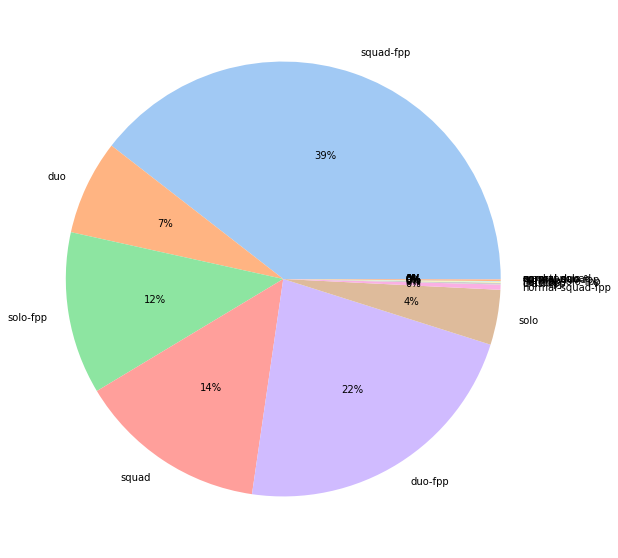

In [12]:
plt.figure(figsize=(10,10)) 
colors = sns.color_palette('pastel')
plt.pie(game_type_dict.values(), labels = game_type_dict.keys(), colors = colors, autopct='%.0f%%')
plt.show()

In [13]:
raw_data.duplicated(subset = 'Id').any()

False

In [14]:
duplicated = set(raw_data[raw_data.duplicated(subset = 'groupId')]['groupId'])
print(len(duplicated))

1234468


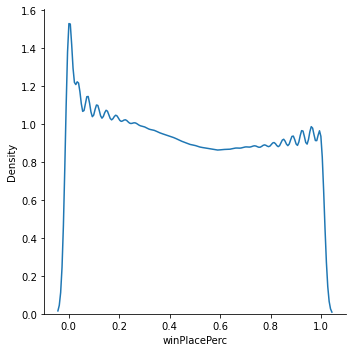

In [15]:
sns.displot(raw_data['winPlacePerc'], kind = 'kde')
plt.show()

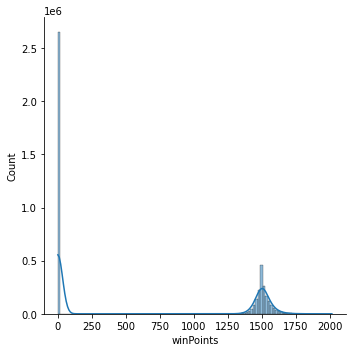

In [16]:
sns.displot(raw_data['winPoints'], kde = True)
plt.show()

In [17]:
grouped_assists = raw_data.groupby('matchType')['assists'].agg([np.mean, np.median])
grouped_damageDealt = raw_data.groupby('matchType')['damageDealt'].agg([np.mean, np.median])
grouped_kills = raw_data.groupby('matchType')['kills'].agg([np.mean, np.median])
grouped_teamKills = raw_data.groupby('matchType')['teamKills'].agg([np.mean, np.median])
grouped_DBNOs  = raw_data.groupby('matchType')['DBNOs'].agg([np.mean, np.median])

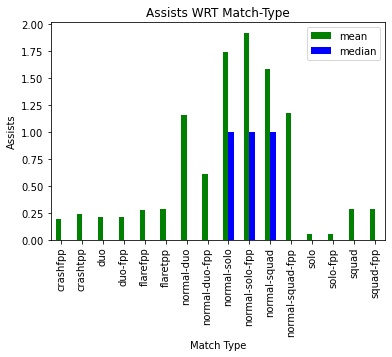

In [18]:
grouped_assists.plot.bar(color = ["green", 'blue'])
plt.xlabel('Match Type')
plt.ylabel('Assists')
plt.title("Assists WRT Match-Type")
plt.show()   

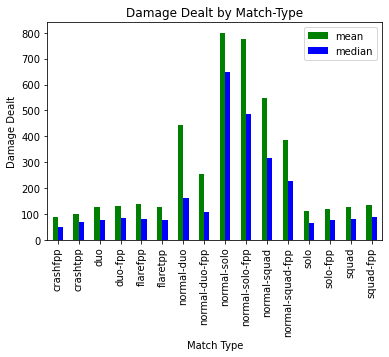

In [19]:
grouped_damageDealt.plot.bar(color = ["green", 'blue'])
plt.xlabel('Match Type')
plt.ylabel('Damage Dealt')
plt.title("Damage Dealt by Match-Type")
plt.show()  

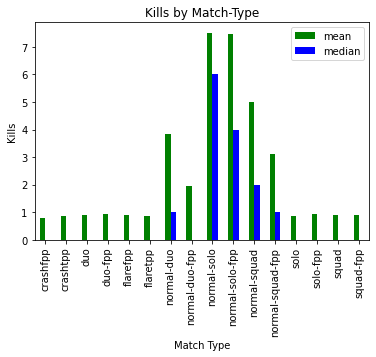

In [20]:
grouped_kills.plot.bar(color = ["green", 'blue'])
plt.xlabel('Match Type')
plt.ylabel('Kills')
plt.title("Kills by Match-Type")
plt.show()  

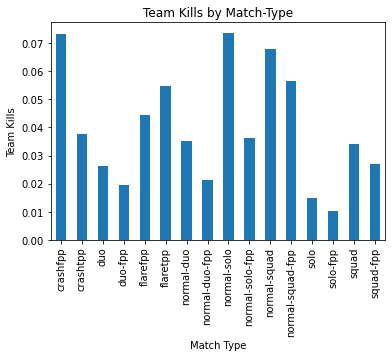

In [21]:
grouped_teamKills['mean'].plot.bar()
plt.xlabel('Match Type')
plt.ylabel('Team Kills')
plt.title("Team Kills by Match-Type")
plt.show()  

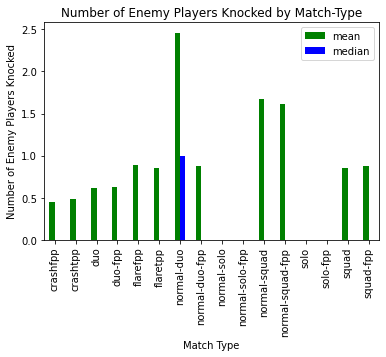

In [22]:
grouped_DBNOs.plot.bar(color = ["green", 'blue'])
plt.xlabel('Match Type')
plt.ylabel('Number of Enemy Players Knocked')
plt.title("Number of Enemy Players Knocked by Match-Type")
plt.show()  

In [23]:
cols_to_drop = ['Id','groupId','matchId']
df = raw_data.drop(cols_to_drop, axis = 1)

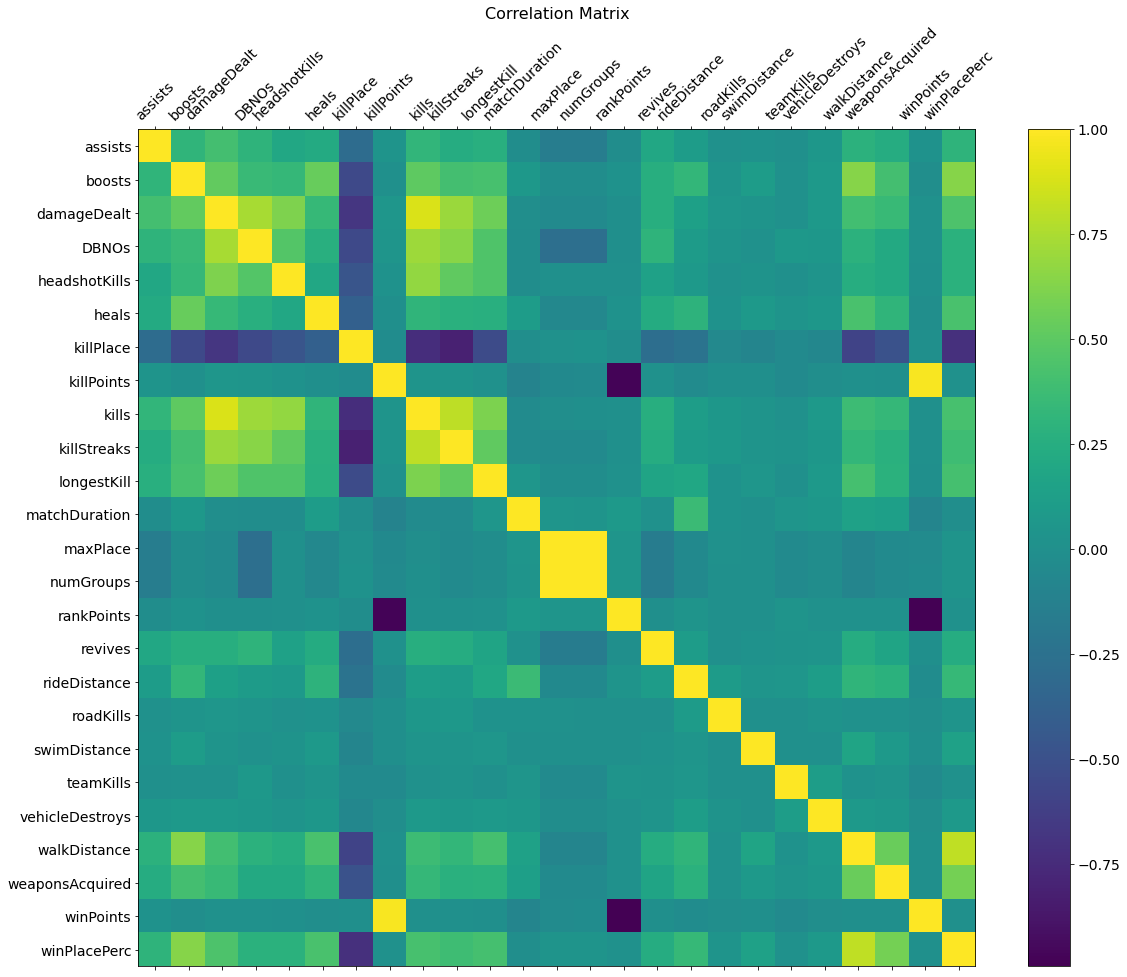

In [24]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [25]:
scaler = StandardScaler()
scaler.fit(df.drop(['matchType', 'winPlacePerc'], axis = 1))
scaled = scaler.transform(df.drop(['matchType', 'winPlacePerc'], axis = 1))

In [26]:
scaled_df = pd.DataFrame(scaled, columns = list(df.drop(['matchType', 'winPlacePerc'], axis = 1).columns))
scaled_df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.37668,-0.511252,0.451541,1.172889,-0.593402,-0.765087,...,-1.212262,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.768416,-1.083021,1.162011
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.37668,-0.511252,0.342303,-0.804784,-0.593402,-0.765087,...,0.803627,-0.34873,-0.404521,-0.047648,0.214105,-0.142589,-0.085499,0.236403,0.545283,-0.819873
2,1.301767,-0.645129,-0.367238,-0.574191,-0.37668,-0.511252,-0.021824,-0.804784,-0.593402,-0.765087,...,0.813129,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.838547,-0.675945,-0.819873
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.37668,-0.511252,0.997732,-0.804784,-0.593402,-0.765087,...,0.700457,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.803989,-0.268869,-0.819873
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.37668,-0.511252,-0.094650,-0.804784,0.048264,0.641438,...,0.906797,-0.34873,-0.404524,-0.047648,-0.147836,-0.142589,-0.085499,-0.933224,-0.675945,-0.819873


In [27]:
scaled_df.shape

(4446965, 24)

In [28]:
encoder = OneHotEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(df[['matchType']]).toarray())
encoded_df.columns = list(encoder.get_feature_names_out())

In [29]:
encoded_df.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
print(encoded_df.shape)
print(scaled_df.shape)
print(len(df['winPlacePerc']))

(4446965, 16)
(4446965, 24)
4446965


In [31]:
X = scaled_df.join(encoded_df)

In [32]:
X.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,-0.397257,-0.645129,-0.765410,-0.574191,-0.37668,-0.511252,0.451541,1.172889,-0.593402,-0.765087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.397257,-0.645129,-0.229810,-0.574191,-0.37668,-0.511252,0.342303,-0.804784,-0.593402,-0.765087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.301767,-0.645129,-0.367238,-0.574191,-0.37668,-0.511252,-0.021824,-0.804784,-0.593402,-0.765087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.397257,-0.645129,-0.572765,-0.574191,-0.37668,-0.511252,0.997732,-0.804784,-0.593402,-0.765087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.397257,-0.645129,-0.179863,-0.574191,-0.37668,-0.511252,-0.094650,-0.804784,0.048264,0.641438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
y = df['winPlacePerc']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [35]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
y_pred_xgb = xg_reg.predict(X_test)
y_pred_train_xgb = xg_reg.predict(X_train)

In [37]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print('Training Set Root Mean Squared Error: ', rmse_train)
print('Testing Set Root Mean Squared Error: ', rmse_test)

Training Set Root Mean Squared Error:  0.08054111490805252
Testing Set Root Mean Squared Error:  0.08144528929704921


In [42]:
def predict_results(test):
    if test.isnull().sum().sum()!=0:
        error = 'Error: Data contains NULLs!'
        return error
    else:
        cols_to_drop = ['Id','groupId','matchId']
        test = test.drop(cols_to_drop, axis = 1)
        test_scaled = pd.DataFrame(scaler.transform(test.drop('matchType', axis = 1)), columns = list(test.drop('matchType', axis = 1).columns))
        test_encoded = pd.DataFrame(encoder.fit_transform(test[['matchType']]).toarray())
        test_encoded.columns = list(encoder.get_feature_names())
        test_X = test_scaled.join(test_encoded)
        results = pd.DataFrame(xg_reg.predict(test_X))
        return results

In [43]:
raw_data_test = pd.read_csv(r"test_V2.csv")

In [44]:
raw_data_test.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [48]:
test_results = predict_results(raw_data_test)
test_results['Id'] = raw_data_test['Id']
test_results.rename(columns = {0:'winPlacePerc'})

,winPlacePerc,Id
0,0.251205,9329eb41e215eb
1,0.966886,639bd0dcd7bda8
2,0.669587,63d5c8ef8dfe91
3,0.513309,cf5b81422591d1
4,0.924701,ee6a295187ba21
...,...,...
1934169,0.695163,a316c3a13887d5
1934170,0.450836,5312146b27d875
1934171,0.903879,fc8818b5b32ad3
1934172,0.852812,a0f91e35f8458f
